<a href="https://colab.research.google.com/github/plusheart/NTHU_2025_GenAI/blob/main/Dict/w2_NN%E8%BE%A8%E8%AD%98%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路方面
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 互動設計用
from ipywidgets import interact_manual

In [ ]:
# 超參數設定
N1, N2, N3, N4 = 512, 256, 128, 64
BATCH_SIZE = 100
EPOCHS = 100
LEARNING_RATE = 0.001

# dataset

In [ ]:
# 載入 MNIST 資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


In [ ]:
# 60000筆數據，每筆為28*28 矩陣
x_train.shape

(60000, 28, 28)

In [ ]:
def show_xy(n=0):
    ax = plt.gca()
    X = x_train[n]
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(X, cmap = 'Greys')
    print(f'本資料 y 給定的答案為: {y_train[n]}')

In [ ]:
interact_manual(show_xy, n=(0,59999));

interactive(children=(IntSlider(value=0, description='n', max=59999), Button(description='Run Interact', style…

# Reshape


*   28x28=784 長的向量
*   轉換成0~255之間

In [ ]:
x_train = x_train.reshape(60000, 784) / 255.0
x_test = x_test.reshape(10000, 784) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 建立NN


*   在每層全連接層後加入 Batch Normalization，使每批資料的分布更穩定
*   新增 Dropout: 隨機關閉部分神經
*   分類問題損失函數改成categorical_crossentropy(原為mse)
*   改用 Adam 優化器(原為SGD)
*   EarlyStopping: 若連續 10 輪沒有進步，自動停止訓練







In [ ]:
# 建立模型
model = Sequential()
model.add(Dense(N1, input_dim=784, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(N2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(N3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(N4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=LEARNING_RATE), metrics=['accuracy'])

In [ ]:
# 訓練模型（加入 EarlyStopping 機制）
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping], verbose=1)

Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8060 - loss: 0.6418 - val_accuracy: 0.9611 - val_loss: 0.1298
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9515 - loss: 0.1629 - val_accuracy: 0.9688 - val_loss: 0.0975
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9650 - loss: 0.1163 - val_accuracy: 0.9722 - val_loss: 0.0909
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9706 - loss: 0.0992 - val_accuracy: 0.9738 - val_loss: 0.0938
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9759 - loss: 0.0802 - val_accuracy: 0.9737 - val_loss: 0.0995
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9751 - loss: 0.0766 - val_accuracy: 0.9743 - val_loss: 0.0885
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9769 - loss: 0.0713 - val_accuracy: 0.9759 - val_loss: 0.0873
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9800 - loss: 0.0627 - val_acc

In [ ]:
# 評估模型
loss, acc = model.evaluate(x_test, y_test)
print(f"測試資料正確率: {acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9787 - loss: 0.0813
測試資料正確率: 98.19%


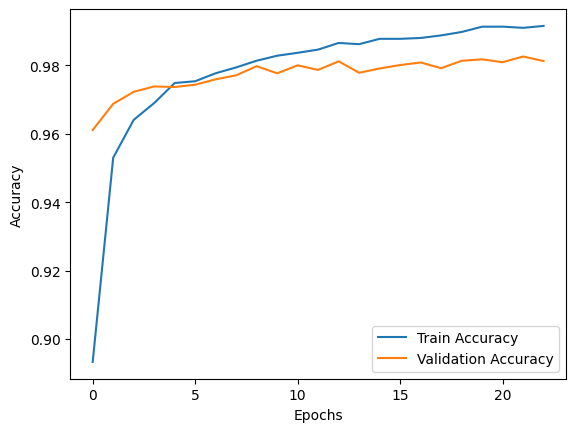

In [ ]:
# 繪製訓練過程
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 效果

In [ ]:
# 預測
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28, 28), cmap='Greys')
    plt.show()
    print('神經網路判斷為:', predict[測試編號])

In [ ]:
interact_manual(test, 測試編號=(0, 9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [ ]:
# 評估分數
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.0813
loss: 0.06731656193733215
正確率 0.9818999767303467
